# 2. Perform image processing with `piXedfit_images` module
<font size="4"> In this tutorial, we use 12 band-images (from GALEX, SDSS, 2MASS, and WISE) that are background-free and the variance images have been derived.
    
Overall, image processing is performed using `piXedfit.piXedfit_images.images_processing` class. </font>

In [1]:
import numpy as np
from astropy.io import fits
import os, sys
import matplotlib.pyplot as plt

global PIXEDFIT_HOME
PIXEDFIT_HOME = os.environ['PIXEDFIT_HOME']
sys.path.insert(0, PIXEDFIT_HOME)

%matplotlib inline

In [2]:
# calling images_processing class
from piXedfit.piXedfit_images import images_processing

## 2.1. Preparing inputs

In [3]:
filters = ['galex_fuv', 'galex_nuv', 'sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 
           'sdss_z', '2mass_j', '2mass_h', '2mass_k', 'wise_w1', 'wise_w2']

# input science images
sci_img = {}
sci_img['galex_fuv'] = 'GI1_009100_NGC0309-fd-intbgsub.fits'
sci_img['galex_nuv'] = 'GI1_009100_NGC0309-nd-intbgsub.fits'
sci_img['sdss_u'] = 'frame-u-001740-3-0115.fits'
sci_img['sdss_g'] = 'frame-g-001740-3-0115.fits'
sci_img['sdss_r'] = 'frame-r-001740-3-0115.fits'
sci_img['sdss_i'] = 'frame-i-001740-3-0115.fits'
sci_img['sdss_z'] = 'frame-z-001740-3-0115.fits'
sci_img['2mass_j'] = 'skybgsub_aJ_asky_001022s0620186.fits'
sci_img['2mass_h'] = 'skybgsub_aH_asky_001022s0620186.fits'
sci_img['2mass_k'] = 'skybgsub_aK_asky_001022s0620186.fits'
sci_img['wise_w1'] = 'skybgsub_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'
sci_img['wise_w2'] = 'skybgsub_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'

# Variance images
var_img = {}
var_img['galex_fuv'] = 'var_GI1_009100_NGC0309-fd-intbgsub.fits'
var_img['galex_nuv'] = 'var_GI1_009100_NGC0309-nd-intbgsub.fits'
var_img['sdss_u'] = 'var_frame-u-001740-3-0115.fits'
var_img['sdss_g'] = 'var_frame-g-001740-3-0115.fits'
var_img['sdss_r'] = 'var_frame-r-001740-3-0115.fits'
var_img['sdss_i'] = 'var_frame-i-001740-3-0115.fits'
var_img['sdss_z'] = 'var_frame-z-001740-3-0115.fits'
var_img['2mass_j'] = 'var_skybgsub_aJ_asky_001022s0620186.fits'
var_img['2mass_h'] = 'var_skybgsub_aH_asky_001022s0620186.fits'
var_img['2mass_k'] = 'var_skybgsub_aK_asky_001022s0620186.fits'
var_img['wise_w1'] = 'var_0138m107_ac51-w1-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'
var_img['wise_w2'] = 'var_0138m107_ac51-w2-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits'

# Pixel sizes
img_pixsizes = {}
img_pixsizes['galex_fuv'] = 1.5
img_pixsizes['galex_nuv'] = 1.5
img_pixsizes['sdss_u'] = 0.396
img_pixsizes['sdss_g'] = 0.396
img_pixsizes['sdss_r'] = 0.396
img_pixsizes['sdss_i'] = 0.396
img_pixsizes['sdss_z'] = 0.396
img_pixsizes['2mass_j'] = 1.0
img_pixsizes['2mass_h'] = 1.0
img_pixsizes['2mass_k'] = 1.0
img_pixsizes['wise_w1'] = 1.375
img_pixsizes['wise_w2'] = 1.375

# Unit of pixel value: 0 for flux and 1 for surface brightness
img_unit = {}
img_unit['galex_fuv'] = 0
img_unit['galex_nuv'] = 0
img_unit['sdss_u'] = 0
img_unit['sdss_g'] = 0
img_unit['sdss_r'] = 0
img_unit['sdss_i'] = 0
img_unit['sdss_z'] = 0
img_unit['2mass_j'] = 0
img_unit['2mass_h'] = 0
img_unit['2mass_k'] = 0
img_unit['wise_w1'] = 0
img_unit['wise_w2'] = 0

gal_ra = 14.177751925               
gal_dec = -9.913864294
gal_z = 0.0188977
stamp_size = [131,131]

## 2.2. Call images_processing class

In [4]:
img_process = images_processing(filters=filters,sci_img=sci_img,var_img=var_img,
                                img_pixsizes=img_pixsizes,img_unit=img_unit,
                                gal_ra=gal_ra,gal_dec=gal_dec,gal_z=gal_z,stamp_size=stamp_size)

<font size="4"> **Run image processing**. This process will bring all the images into the same spatial resolution and sampling. </font>

In [5]:
output_stamps = img_process.reduced_stamps()

[PSF matching to wise_w2]
[Cropping images around target galaxy to minimize PSF matching time]
[produce crop_GI1_009100_NGC0309-fd-intbgsub.fits]
[produce crop_var_GI1_009100_NGC0309-fd-intbgsub.fits]
brightest pixel: (304,303)
desired new dimension: (201 x 201)
desired central position: (100,100)
[PSF matching]
[produce psfmatch_crop_GI1_009100_NGC0309-fd-intbgsub.fits]
[produce psfmatch_crop_var_GI1_009100_NGC0309-fd-intbgsub.fits]
[Cropping images around target galaxy to minimize PSF matching time]
[produce crop_GI1_009100_NGC0309-nd-intbgsub.fits]
[produce crop_var_GI1_009100_NGC0309-nd-intbgsub.fits]
brightest pixel: (303,303)
desired new dimension: (201 x 201)
desired central position: (100,100)
[PSF matching]
[produce psfmatch_crop_GI1_009100_NGC0309-nd-intbgsub.fits]
[produce psfmatch_crop_var_GI1_009100_NGC0309-nd-intbgsub.fits]
[Cropping images around target galaxy to minimize PSF matching time]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce crop_frame-u-001740-3-0115.fits]
[produce crop_var_frame-u-001740-3-0115.fits]
brightest pixel: (1150,1150)
desired new dimension: (749 x 749)
desired central position: (374,374)
[PSF matching]
[produce psfmatch_crop_frame-u-001740-3-0115.fits]
[produce psfmatch_crop_var_frame-u-001740-3-0115.fits]
[Cropping images around target galaxy to minimize PSF matching time]
[produce crop_frame-g-001740-3-0115.fits]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce crop_var_frame-g-001740-3-0115.fits]
brightest pixel: (1150,1150)
desired new dimension: (749 x 749)
desired central position: (374,374)
[PSF matching]
[produce psfmatch_crop_frame-g-001740-3-0115.fits]
[produce psfmatch_crop_var_frame-g-001740-3-0115.fits]
[Cropping images around target galaxy to minimize PSF matching time]
[produce crop_frame-r-001740-3-0115.fits]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce crop_var_frame-r-001740-3-0115.fits]
brightest pixel: (1150,1150)
desired new dimension: (749 x 749)
desired central position: (374,374)
[PSF matching]
[produce psfmatch_crop_frame-r-001740-3-0115.fits]
[produce psfmatch_crop_var_frame-r-001740-3-0115.fits]
[Cropping images around target galaxy to minimize PSF matching time]
[produce crop_frame-i-001740-3-0115.fits]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce crop_var_frame-i-001740-3-0115.fits]
brightest pixel: (1150,1150)
desired new dimension: (749 x 749)
desired central position: (374,374)
[PSF matching]
[produce psfmatch_crop_frame-i-001740-3-0115.fits]
[produce psfmatch_crop_var_frame-i-001740-3-0115.fits]
[Cropping images around target galaxy to minimize PSF matching time]
[produce crop_frame-z-001740-3-0115.fits]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce crop_var_frame-z-001740-3-0115.fits]
brightest pixel: (1150,1150)
desired new dimension: (749 x 749)
desired central position: (374,374)
[PSF matching]
[produce psfmatch_crop_frame-z-001740-3-0115.fits]
[produce psfmatch_crop_var_frame-z-001740-3-0115.fits]
[Cropping images around target galaxy to minimize PSF matching time]
[produce crop_skybgsub_aJ_asky_001022s0620186.fits]
[produce crop_var_skybgsub_aJ_asky_001022s0620186.fits]
brightest pixel: (455,455)
desired new dimension: (299 x 299)
desired central position: (149,149)
[PSF matching]
[produce psfmatch_crop_skybgsub_aJ_asky_001022s0620186.fits]
[produce psfmatch_crop_var_skybgsub_aJ_asky_001022s0620186.fits]
[Cropping images around target galaxy to minimize PSF matching time]
[produce crop_skybgsub_aH_asky_001022s0620186.fits]
[produce crop_var_skybgsub_aH_asky_001022s0620186.fits]
brightest pixel: (455,455)
desired new dimension: (299 x 299)
desired central position: (149,149)
[PSF matching]
[produce psfmatch_crop_skyb

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce stamp_psfmatch_crop_frame-u-001740-3-0115.fits]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce stamp_psfmatch_crop_var_frame-u-001740-3-0115.fits]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce stamp_psfmatch_crop_frame-g-001740-3-0115.fits]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce stamp_psfmatch_crop_var_frame-g-001740-3-0115.fits]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce stamp_psfmatch_crop_frame-r-001740-3-0115.fits]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce stamp_psfmatch_crop_var_frame-r-001740-3-0115.fits]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce stamp_psfmatch_crop_frame-i-001740-3-0115.fits]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce stamp_psfmatch_crop_var_frame-i-001740-3-0115.fits]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce stamp_psfmatch_crop_frame-z-001740-3-0115.fits]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


[produce stamp_psfmatch_crop_var_frame-z-001740-3-0115.fits]
[produce stamp_psfmatch_crop_skybgsub_aJ_asky_001022s0620186.fits]
[produce stamp_psfmatch_crop_var_skybgsub_aJ_asky_001022s0620186.fits]
[produce stamp_psfmatch_crop_skybgsub_aH_asky_001022s0620186.fits]
[produce stamp_psfmatch_crop_var_skybgsub_aH_asky_001022s0620186.fits]
[produce stamp_psfmatch_crop_skybgsub_aK_asky_001022s0620186.fits]
[produce stamp_psfmatch_crop_var_skybgsub_aK_asky_001022s0620186.fits]
[produce stamp_psfmatch_crop_skybgsub_0138m107_ac51-w1-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits]
[produce stamp_psfmatch_crop_var_0138m107_ac51-w1-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits]
[produce stamp_skybgsub_0138m107_ac51-w2-int-3_ra14.177751925_dec-9.913864294_asec1000.000.fits]
[produce stamp_var_0138m107_ac51-w2-unc-3_ra14.177751925_dec-9.913864294_asec1000.000.fits]


<font size="4"> Check results of images processing: stamps of reduced images. </font>

/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


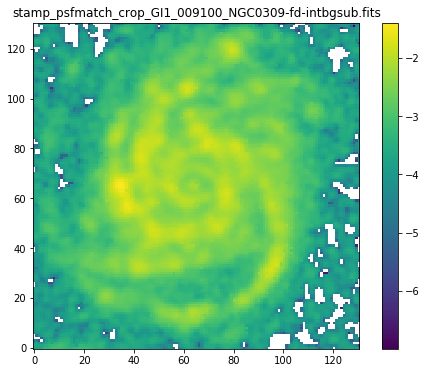

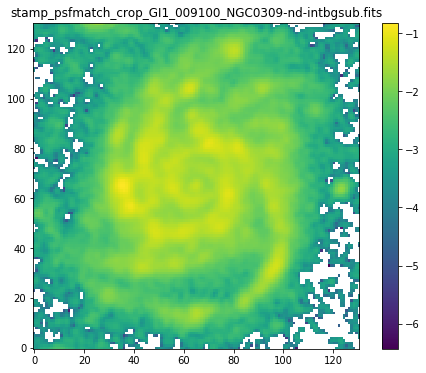

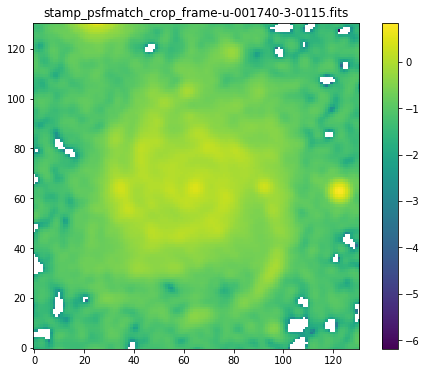

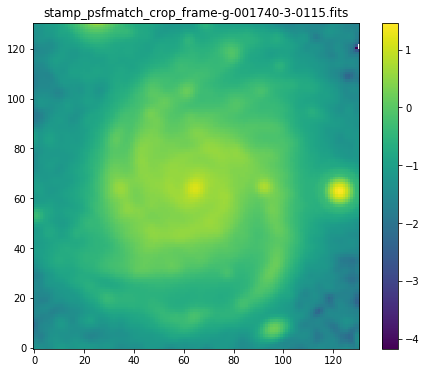

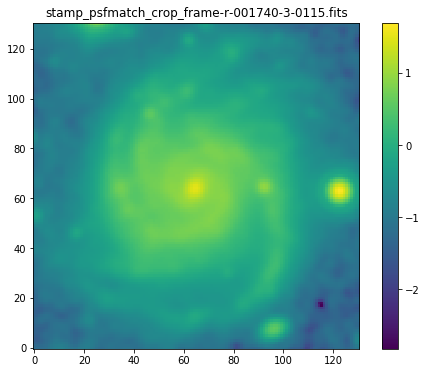

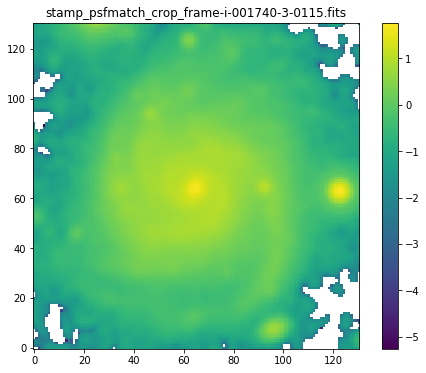

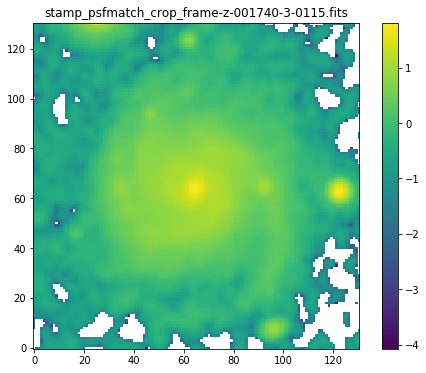

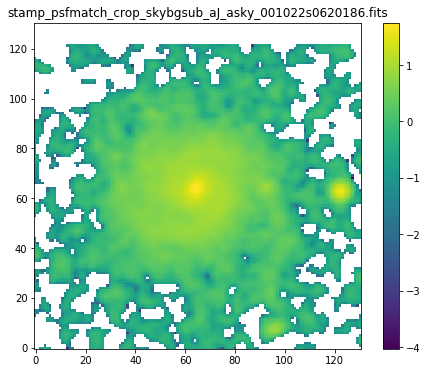

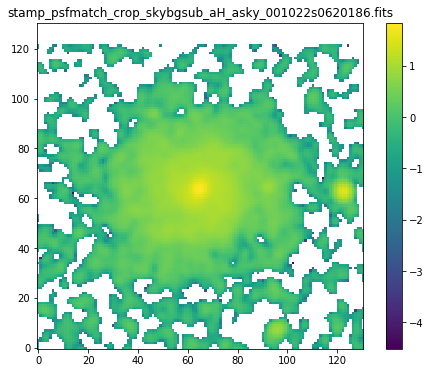

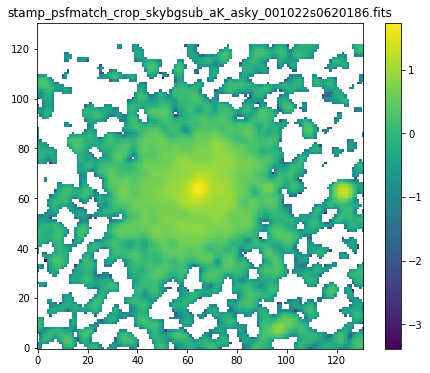

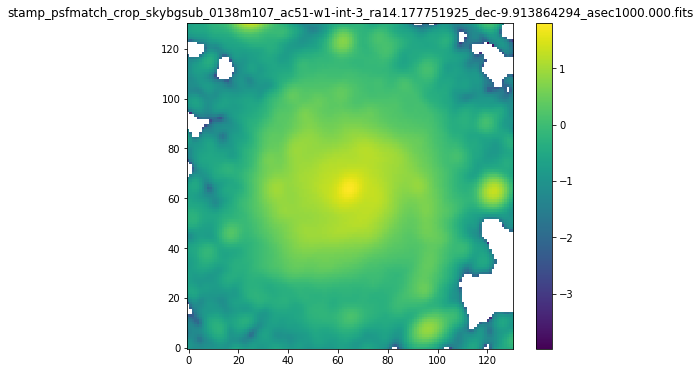

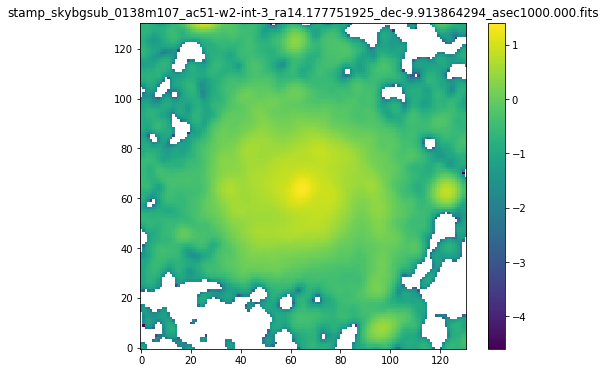

In [6]:
%matplotlib inline

nbands = len(filters)
for bb in range(0,nbands):
    str_temp = "name_img_%s" % filters[bb]
    hdu = fits.open(output_stamps[str_temp])
    data_image = hdu[0].data
    hdu.close()
    
    fig1 = plt.figure(figsize=(8,6))
    f1 = plt.subplot()
    plt.title("%s" % output_stamps[str_temp])
    plt.imshow(np.log10(data_image), origin='lower')
    plt.colorbar()

## 2.3. Define galaxy's region
<font size="4"> User is free to define the region of the galaxy. We can define circular (or elliptical) region. The final `gal_region` array (2D) should have the same size to that of the stamp images. In the `gal_region` array, pixels belong to the galaxy's region should be given with value of 1 and 0 otherwise. Alternatively, we can also define `gal_region` using SExtractor segmentation maps. In this tutorial, I will use the former way while also leaving script for doing the letter.</font>

### 2.3.1. In case of using SExtractor segmentation map

### segmentation with sextractor:
detect_thresh = 5.0
detect_minarea = 500
deblend_nthresh = 5
deblend_mincont = 1.0
segm_map,segm_map_name = img_process.segmentation_sextractor(output_stamps=output_stamps,
                                                              detect_thresh=detect_thresh,
                                                 detect_minarea=detect_minarea,deblend_nthresh=deblend_nthresh,
                                                 deblend_mincont=deblend_mincont)

### Check segmentation map
for ii in range(0,nbands):
    fig1 = plt.figure(figsize=(5,5))
    f1 = plt.subplot()
    plt.title("id %d: %s" % (int(ii),filters[int(ii)]))
    plt.imshow(segm_map[int(ii)], origin='lower')

### Merge segmentation maps
nbands = len(filters)
name_segmentation_maps = []
for ii in range(0,nbands):
    name_segmentation_maps.append(segm_map_name[ii])

gal_region = img_process.galaxy_region(name_segmentation_maps)

### plotting:
fig1 = plt.figure(figsize=(7,7))
f1 = plt.subplot()
plt.imshow(gal_region, origin='lower')

### 2.3.2. In case of using simple circular/ellipse cropping

/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10


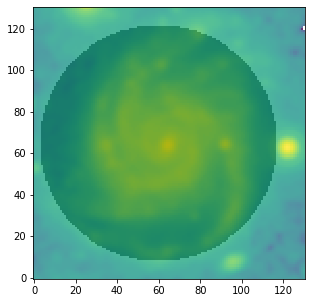

In [7]:
from piXedfit.piXedfit_images import crop_ellipse_galregion

# make a mock initial region with the same size as the stamp images
gal_region0 = np.zeros((stamp_size[0],stamp_size[1])) + 1

y_cent = (stamp_size[0]-1)/2
#x_cent = (stamp_size[1]-1)/2
x_cent = 60 

# circular region
ell = 0.0
pa = 45.0
rmax = 57.0            # in pixel
gal_region = crop_ellipse_galregion(gal_region0, x_cent, y_cent, ell, pa, rmax)

# plot
fig1 = plt.figure(figsize=(5,5))
f1 = plt.subplot()

str_temp = "name_img_%s" % filters[3]
hdu = fits.open(output_stamps[str_temp])
data_image = hdu[0].data
hdu.close()
plt.imshow(np.log10(data_image), origin='lower')
    
plt.imshow(gal_region, origin='lower', cmap='Greys', alpha=0.2)

## 2.4. Calculate E(B-V) associated with the foreground Galactic dust 
<font size="4"> First, we need to estimate the level of attenuation by the foreground galactic dust in the form of E(B-V) parameter. This value can be estimated using the `EBV_foreground_dust` function in **piXedfit**. The inputs are the attenuation level ($A_{\lambda}$) in SDSS bands associated with the galaxy's coordinate on the sky, which can be obtained from the NED data base here https://ned.ipac.caltech.edu/forms/calculator.html. </font>   

In [8]:
from piXedfit.piXedfit_images import EBV_foreground_dust

Alambda_SDSS = []
Alambda_SDSS.append(0.170)
Alambda_SDSS.append(0.132)
Alambda_SDSS.append(0.092)
Alambda_SDSS.append(0.068)
Alambda_SDSS.append(0.051)

Gal_EBV = EBV_foreground_dust(Alambda_SDSS)
print (Gal_EBV)

0.03370103765151496


## 2.5. Calculate fluxes of pixels and get final reduced data

In [9]:
name_out_fits = "fluxmap_ngc309.fits"
flux_maps = img_process.flux_map(output_stamps=output_stamps, gal_region=gal_region, Gal_EBV=Gal_EBV,
                                 name_out_fits=name_out_fits)

[Deriving maps of multiband fluxes and flux uncertainties]
[Calculating fluxes maps for galex_fuv]
[Calculating fluxes maps for galex_nuv]
[Calculating fluxes maps for sdss_u]
[Calculating fluxes maps for sdss_g]
[Calculating fluxes maps for sdss_r]
[Calculating fluxes maps for sdss_i]
[Calculating fluxes maps for sdss_z]
[Calculating fluxes maps for 2mass_j]
[Calculating fluxes maps for 2mass_h]
[Calculating fluxes maps for 2mass_k]
[Calculating fluxes maps for wise_w1]
[Calculating fluxes maps for wise_w2]
[scaling the flux map to a unit of 1.000000e-17 erg/s/cm^2/Ang.]


## 2.6. Check result of image processing

In [10]:
hdu = fits.open("fluxmap_ngc309.fits")
hdu.info()
header = hdu[0].header
print (header)

# get unit of flux in erg/s/cm2/A
unit_flux = float(header['unit'])

# get maps
gal_region = hdu['GALAXY_REGION'].data
flux_map = hdu['FLUX'].data*unit_flux
flux_err_map = hdu['FLUX_ERR'].data*unit_flux
hdu.close()

Filename: fluxmap_ngc309.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1  GALAXY_REGION    1 ImageHDU         8   (131, 131)   float64   
  2  FLUX          1 ImageHDU         9   (131, 131, 12)   float64   
  3  FLUX_ERR      1 ImageHDU         9   (131, 131, 12)   float64   
  4  STAMP_IMAGE    1 ImageHDU       108   (131, 131)   float64   
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  NFILTERS=                   12                                                  RA      =         14.177751925                                                  DEC     =         -9.913864294                                                  Z       =            

<font size="4"> **Get central wavelengths of the filters** that will be used for plotting SEDs of pixels. This can be done using `piXedfit.utils.filtering.cwave_filters` function. </font>

In [11]:
# number of filters:
nbands = len(filters)
print (nbands)

from piXedfit.utils.filtering import cwave_filters

photo_wave = cwave_filters(filters)

12


### 2.6.1. Plot maps of fluxes, flux uncertainties, and S/N

/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


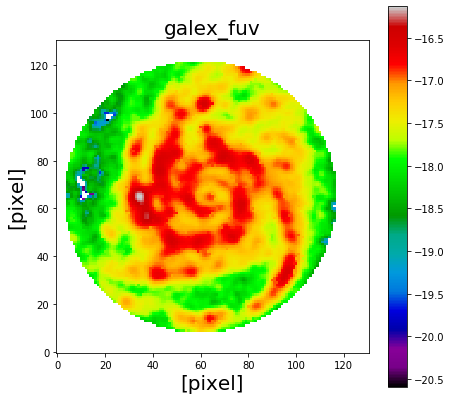

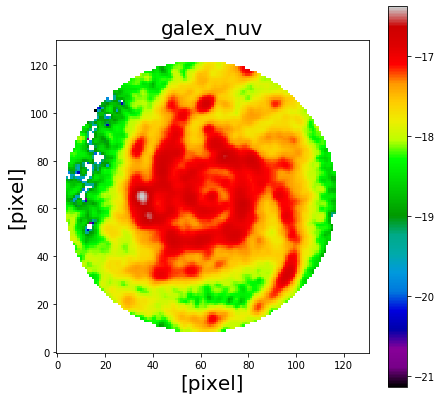

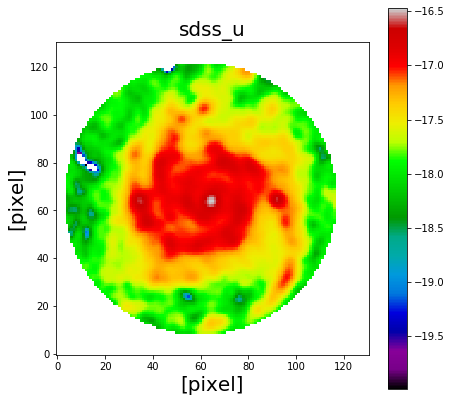

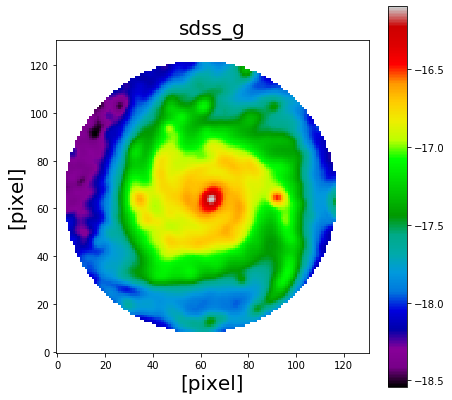

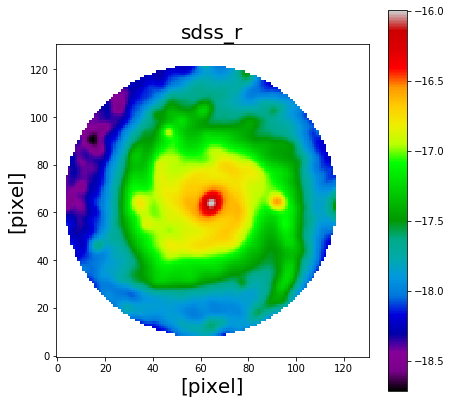

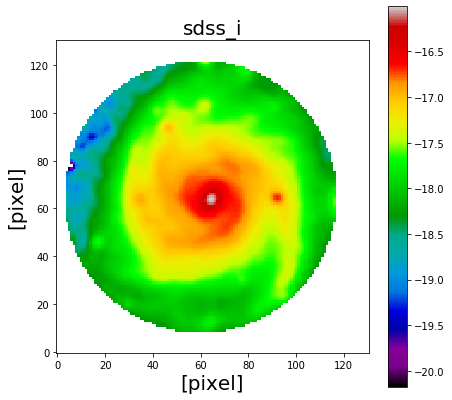

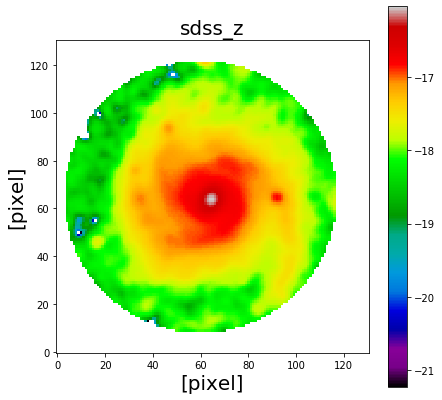

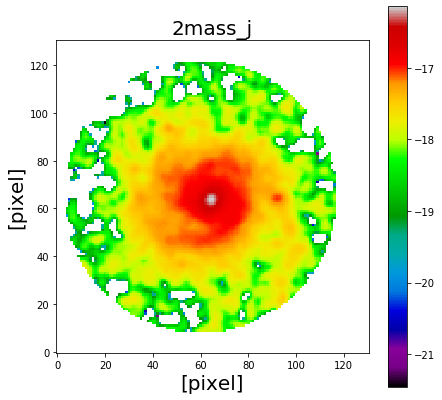

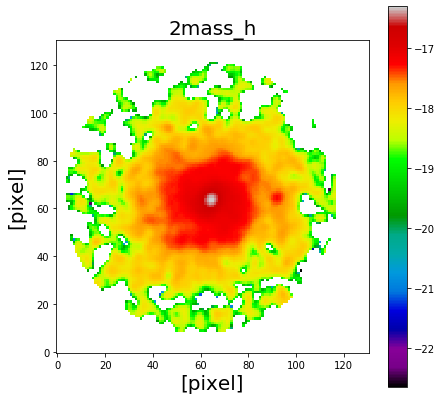

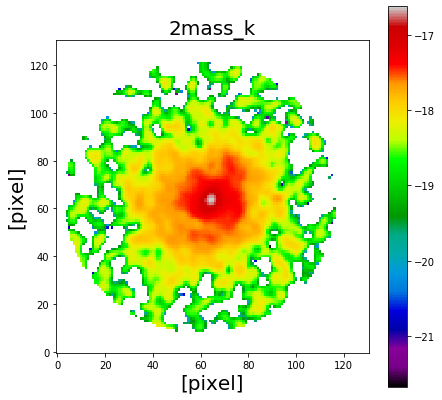

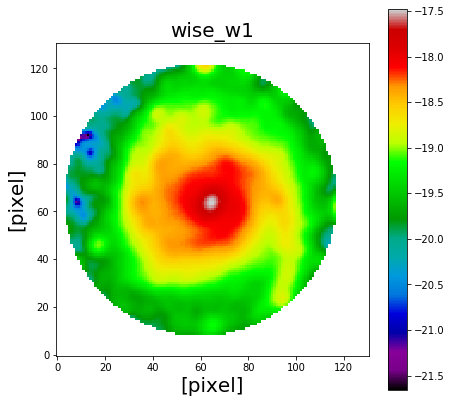

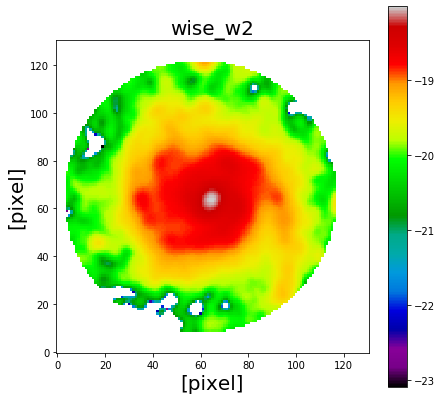

In [12]:
for bb in range(0,nbands):
    fig1 = plt.figure(figsize=(7,7))
    f1 = plt.subplot()
    plt.title("%s" % filters[int(bb)], fontsize=20)
    plt.xlabel("[pixel]", fontsize=20)
    plt.ylabel("[pixel]", fontsize=20)
    plt.imshow(np.log10(flux_map[bb]), origin='lower', cmap='nipy_spectral')
    plt.colorbar()

/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


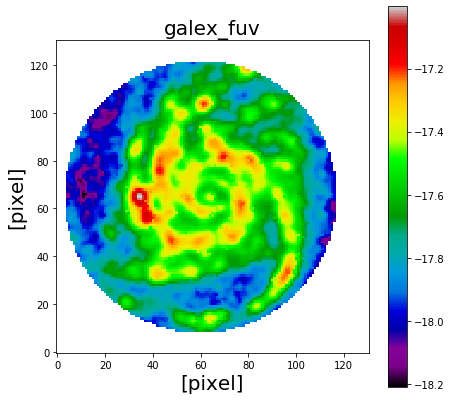

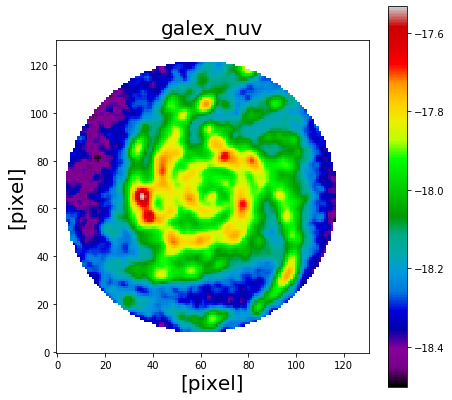

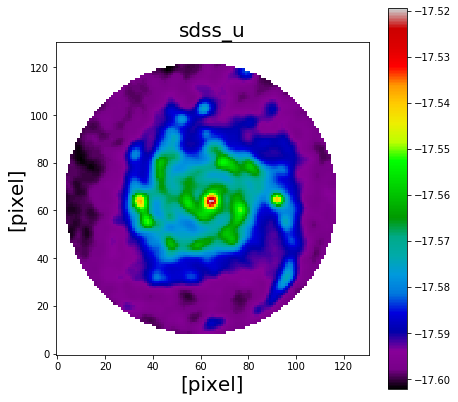

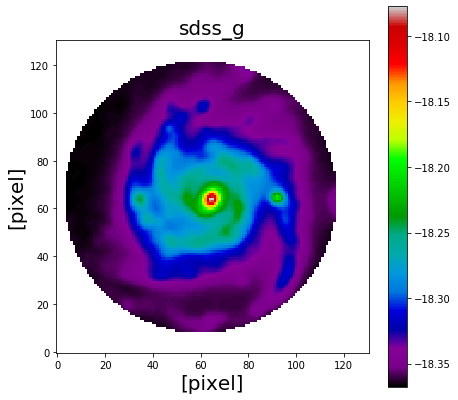

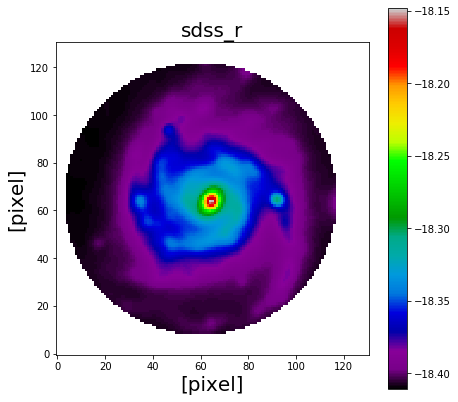

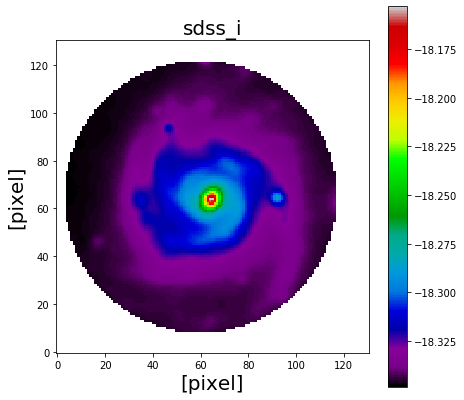

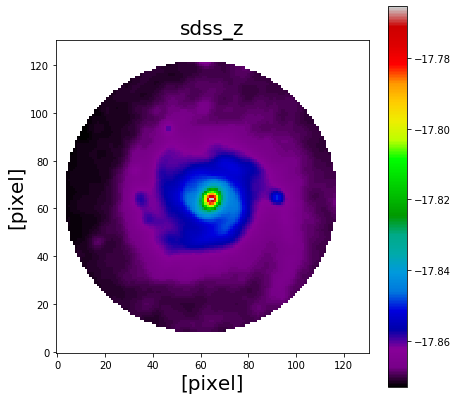

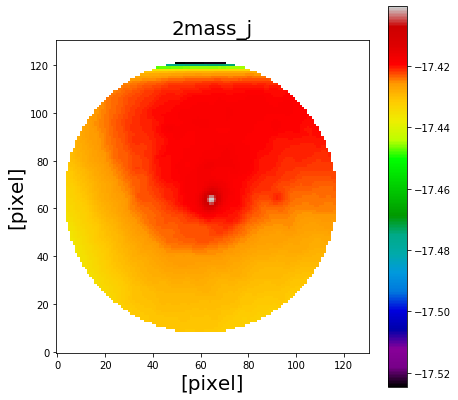

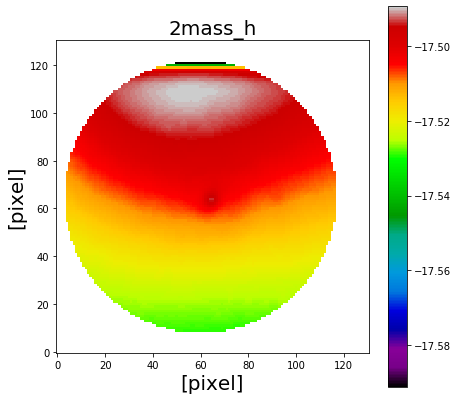

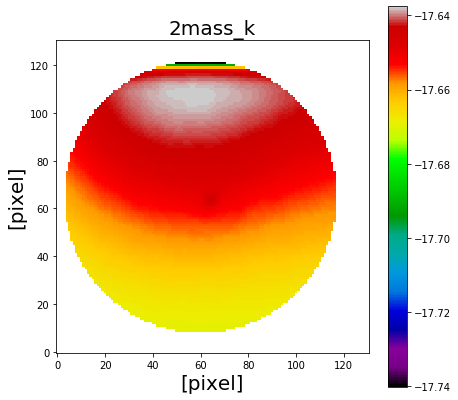

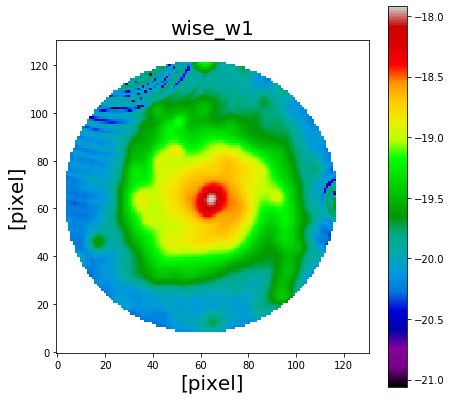

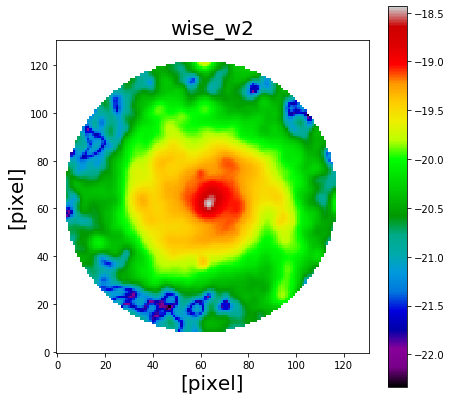

In [13]:
for bb in range(0,nbands):
    fig1 = plt.figure(figsize=(7,7))
    f1 = plt.subplot()
    plt.title("%s" % filters[int(bb)], fontsize=20)
    plt.xlabel("[pixel]", fontsize=20)
    plt.ylabel("[pixel]", fontsize=20)
    plt.imshow(np.log10(flux_err_map[bb]), origin='lower', cmap='nipy_spectral')
    plt.colorbar()

/home/abdurrouf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


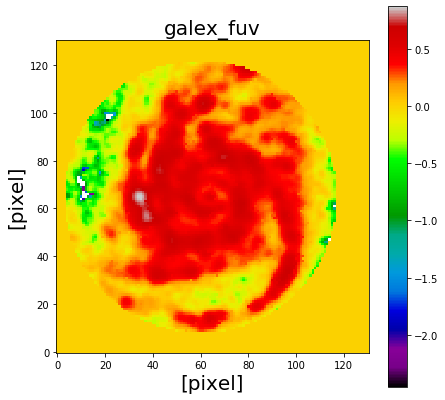

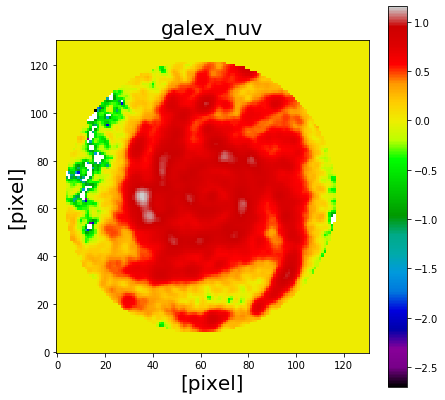

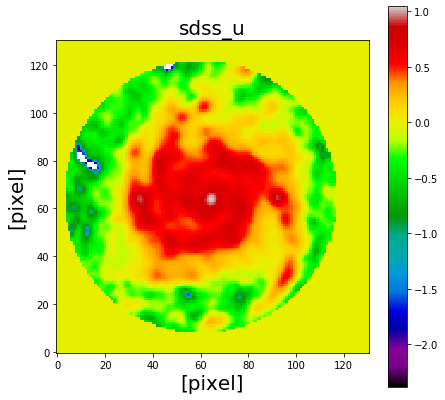

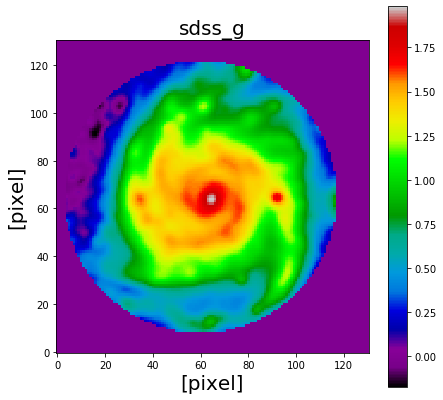

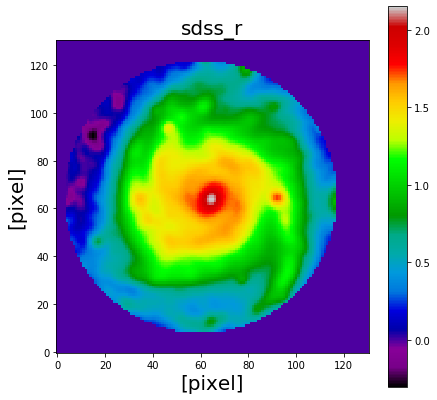

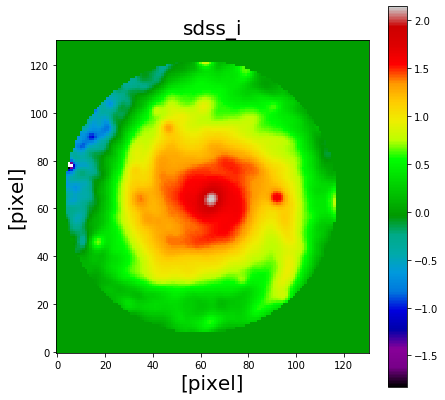

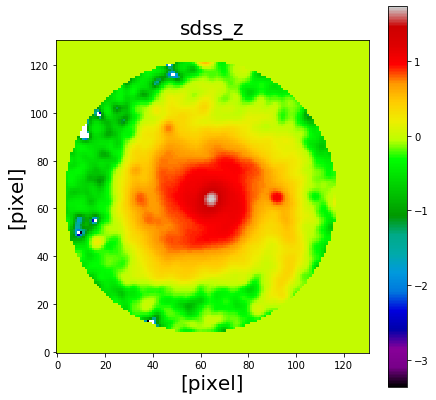

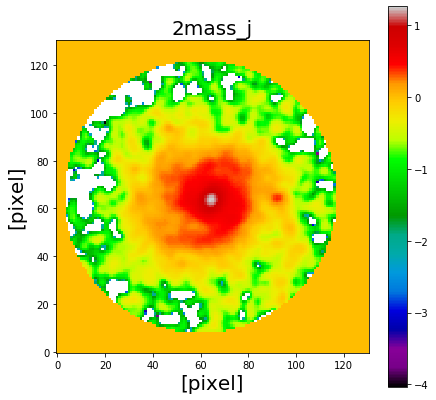

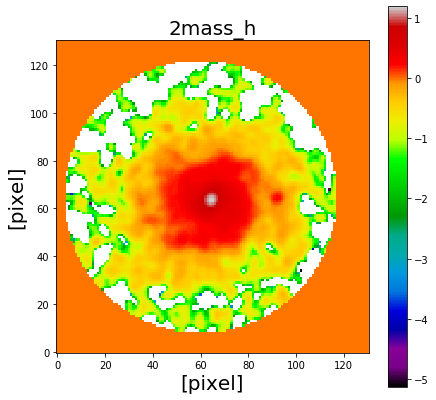

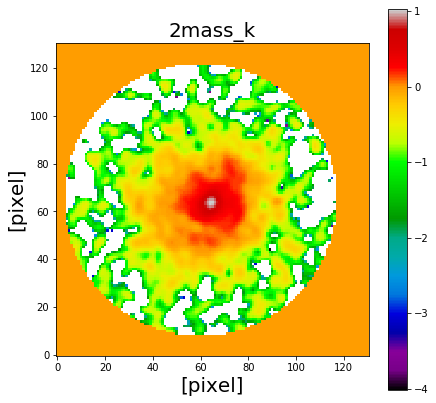

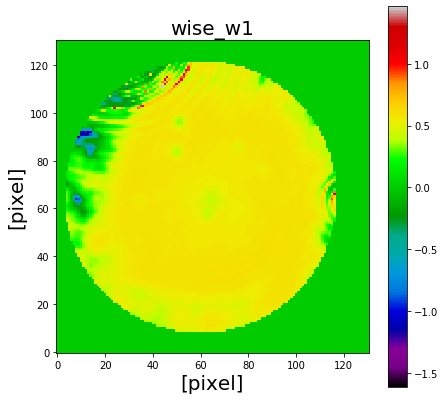

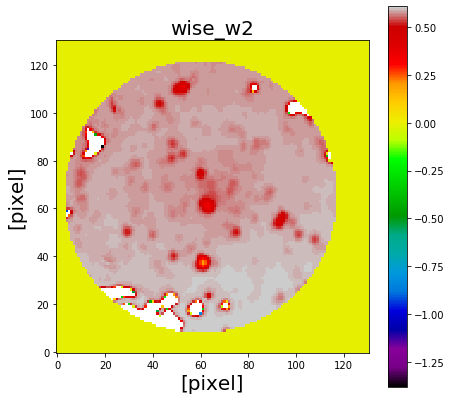

In [14]:
for bb in range(0,nbands):
    fig1 = plt.figure(figsize=(7,7))
    f1 = plt.subplot()
    plt.title("%s" % filters[int(bb)], fontsize=20)
    plt.xlabel("[pixel]", fontsize=20)
    plt.ylabel("[pixel]", fontsize=20)
    plt.imshow(np.log10(flux_map[bb]/flux_err_map[bb]), origin='lower', cmap='nipy_spectral')
    plt.colorbar()

### 2.6.2. Check SEDs of some pixels

In [15]:
## transpose from (band,y,x) => (y,x,band):
pix_SED_flux = np.transpose(flux_map, axes=(1,2,0))
pix_SED_flux_err = np.transpose(flux_err_map, axes=(1,2,0))

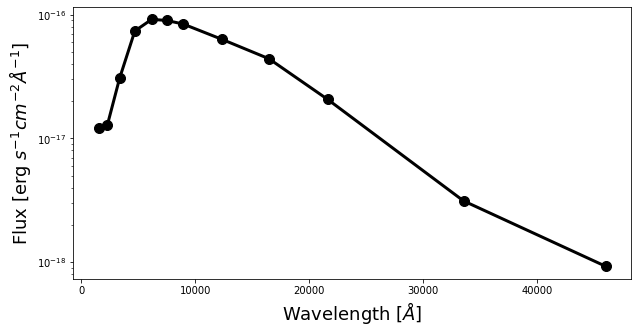

In [16]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()
f1.set_yscale('log')
#f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

# pixel's coordinate
pos_y = 65
pos_x = 65

plt.errorbar(photo_wave, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x]*1e-17, 
                 fmt='-o', markersize=10, lw=3, color='black')
plt.show()

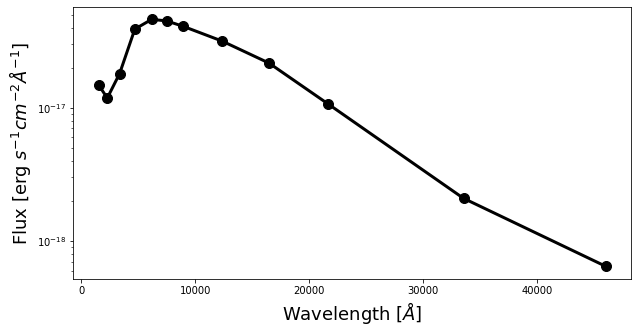

In [17]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()
f1.set_yscale('log')
#f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

# pixel's coordinate
pos_y = 60
pos_x = 63

plt.errorbar(photo_wave, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x]*1e-17, 
                 fmt='-o', markersize=10, lw=3, color='black')
plt.show()

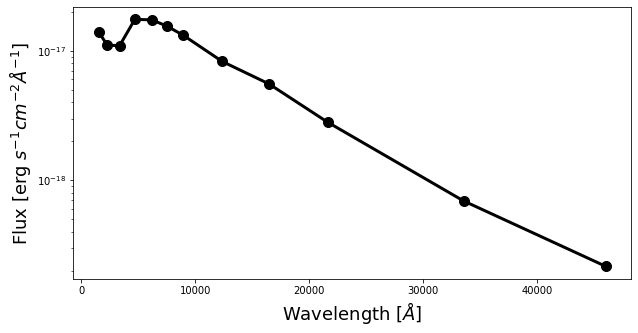

In [18]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()
f1.set_yscale('log')
#f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

# pixel's coordinate
pos_y = 50
pos_x = 63

plt.errorbar(photo_wave, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x]*1e-17, 
                 fmt='-o', markersize=10, lw=3, color='black')
plt.show()

<font size="4"> Bulk of pixels

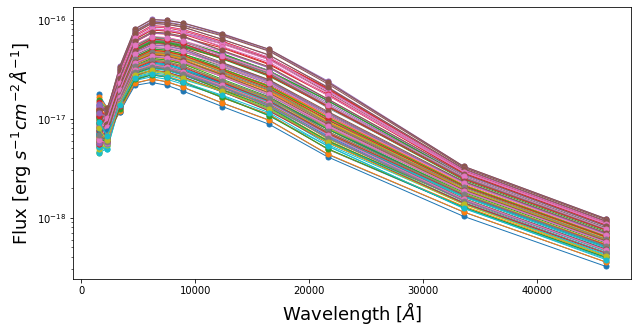

In [19]:
fig1 = plt.figure(figsize=(10,5))
f1 = plt.subplot()

f1.set_yscale('log')
#f1.set_xscale('log')
plt.xlabel(r"Wavelength [$\AA$]", fontsize=18)
plt.ylabel(r"Flux [erg $s^{-1}cm^{-2}\AA^{-1}$]", fontsize=18)

for yy in range(60,70):
    for xx in range(60,70):
        pos_y = yy
        pos_x = xx
        plt.errorbar(photo_wave, pix_SED_flux[pos_y][pos_x], yerr=pix_SED_flux_err[pos_y][pos_x]*1e-17, 
                         fmt='-o', markersize=5, lw=1)

plt.show()